In [14]:
!pip install -q ultralytics roboflow

In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jnTyhorCr4xjZurbs64w")
project = rf.workspace("test-vtdxu").project("thesis-yolov11")
version = project.version(12)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [16]:
import yaml

data_yaml = "thesis-Yolov11-12/data.yaml"

with open(data_yaml) as f:
    data = yaml.safe_load(f)

data["path"] = "/content/thesis-Yolov11-12"

with open(data_yaml, "w") as f:
    yaml.dump(data, f)

print(data)

{'names': ['dental caries', 'restoration', 'tooth'], 'nc': 3, 'path': '/content/thesis-Yolov11-12', 'roboflow': {'license': 'CC BY 4.0', 'project': 'thesis-yolov11', 'url': 'https://universe.roboflow.com/test-vtdxu/thesis-yolov11/dataset/12', 'version': 12, 'workspace': 'test-vtdxu'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [18]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt")
model.train(
    data="/content/thesis-Yolov11-12/data.yaml",
    epochs=40,
    imgsz=640,
    batch=16
)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/thesis-Yolov11-12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7901e9c87e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [19]:
import os
import shutil

# Make sure Drive is mounted first
from google.colab import drive
drive.mount('/content/drive')

# Create folder in Drive
os.makedirs("/content/drive/MyDrive/yolo_model", exist_ok=True)

# Copy model
shutil.copy(
    "/content/runs/detect/train/weights/best.pt",
    "/content/drive/MyDrive/yolo_model/best.pt"
)

print("Model saved to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive!


In [ ]:
# ADD the detection file. Image in JPG format should be uploaded


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from google.colab import files
uploaded = files.upload()

Saving 2.jpg to 2 (1).jpg



image 1/1 /content/2 (1).jpg: 384x640 22 tooths, 104.6ms
Speed: 2.9ms preprocess, 104.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
Saved path: /content/2 (1).jpg


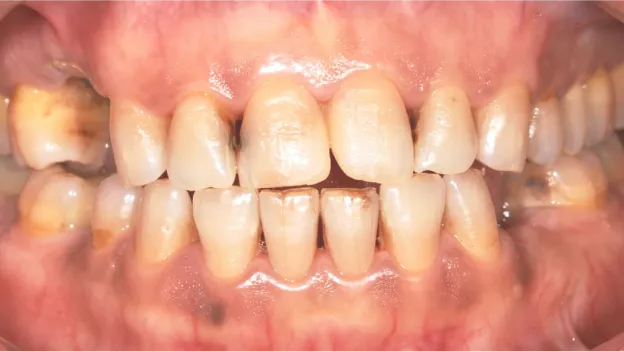

In [22]:
import os
from ultralytics import YOLO
from IPython.display import Image, display

model = YOLO("runs/detect/train/weights/best.pt")

for img_name in uploaded.keys():
    results = model(img_name)[0]

    # Save (uses default predict folder)
    results.save()

    # Get the exact saved path
    saved_path = results.path
    print("Saved path:", saved_path)

    # Display the image
    display(Image(saved_path))


image 1/1 /content/2 (1).jpg: 384x640 3 dental cariess, 25 tooths, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Cavities detected: 3


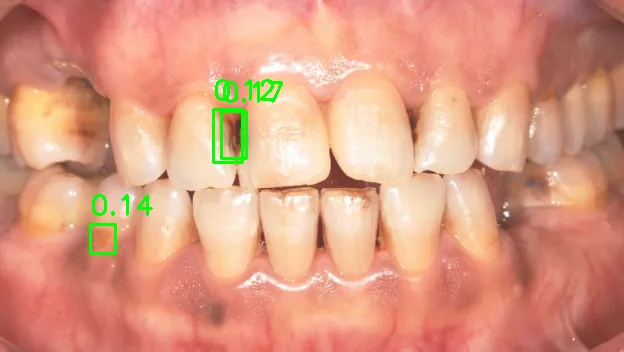

In [23]:
import cv2
import os
from ultralytics import YOLO
from IPython.display import Image, display

os.makedirs("output", exist_ok=True)
model = YOLO("runs/detect/train/weights/best.pt")

for img_name in uploaded.keys():
    results = model(img_name, conf=0.1)[0]   # lower confidence threshold

    img = cv2.imread(img_name)

    cavity_boxes = []
    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        if cls_name == "dental caries":
            cavity_boxes.append(box)

    print("Cavities detected:", len(cavity_boxes))

    for box in cavity_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"{conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    out_path = f"output/{img_name}"
    cv2.imwrite(out_path, img)
    display(Image(out_path))


In [10]:

import os
from ultralytics import YOLO
from IPython.display import Image, display

model = YOLO("runs/detect/train/weights/best.pt")

for img_name in uploaded.keys():
    print(f"\n🔍 Processing: {img_name}")

    # Run inference
    results = model(img_name, conf=0.25)  # Confidence threshold

    # Save annotated image
    results[0].save()

    # Get saved path
    saved_path = results[0].path
    print(f"✅ Saved to: {saved_path}")

    # Print detections
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = results[0].names[class_id]
        print(f"  • {class_name}: {confidence:.2%}")

    # Display
    display(Image(saved_path))

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'